# Problem 1: Implementing Heun's Method for Initial Value Problems

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/WCC-Engineering/pa8-intro-to-ivps-BlakeSneveGit/blob/main/problem1_heuns_method.ipynb)

## Introduction

Heun's method (also known as the improved Euler method) is a predictor-corrector numerical technique for solving ordinary differential equations (ODEs). In this assignment, you will implement Heun's method with an optional iterative corrector for solving initial value problems (IVPs) of the form:

$$\frac{dy}{dt} = f(t, y)$$

with an initial condition $y(t_0) = y_0$.

## Heun's Method

Heun's method consists of two main steps for each time point:

1. **Predictor step** (Euler's method): Make an initial prediction $\tilde{y}_{n+1}$ using Euler's method
   $$\tilde{y}_{n+1} = y_n + h f(t_n, y_n)$$

2. **Corrector step**: Improve the prediction using trapezoidal rule
   $$y_{n+1} = y_n + \frac{h}{2}[f(t_n, y_n) + f(t_{n+1}, \tilde{y}_{n+1})]$$

The corrector step can be applied iteratively by treating each corrected value as a new prediction until a stopping criterion is met. This is known as the iterative corrector method.

## Assignment Tasks

In this assignment, you will:

1. Implement Heun's method with optional iterative corrector
2. Compare its accuracy with Euler's method
3. Apply your implementation to different types of ODEs
4. Visualize the results and analyze the error

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Task 1: Implement Heun's Method

Implement the `heuns_method` function to solve a single ODE using Heun's method with an optional iterative corrector. Your function should:

1. Accept a function that defines the ODE, time span, initial condition, and other parameters
2. Implement the predictor step using Euler's method
3. Implement the corrector step, with an option to iterate to a specified corrector tolerance.
4. Return the time points and the numerical solution

In [19]:
def heuns_method(f, t_span, y0, num_steps, corrector_tol=None, *args, **kwargs):
    """
    Solve an initial value problem using Heun's method with optional iterative corrector.

    Parameters:
    -----------
    f : function
        Function that defines the ODE dy/dt = f(t, y). Must accept additional arguments.
    t_span : tuple
        Tuple of (t_start, t_end) defining the integration interval.
    y0 : float
        Initial condition y(t_start) = y0.
    num_steps : int
        Number of steps to use in the integration.
    corrector_tol : float or None
        Tolerance for iterative corrector. If None, no iteration is performed.
    *args, **kwargs : additional arguments
        Additional arguments to pass to the ODE function f.

    Returns:
    --------
    t : ndarray
        Array of time points.
    y : ndarray
        Array of solution values corresponding to each time point.
    y_c : ndarray or None
        Array of corrector iterations at each step. If no corrector iteration is used,
        returns None.
    """
    # Initialize arrays for time and solution
    t = np.linspace(t_span[0], t_span[1], num_steps + 1)
    h = (t_span[1] - t_span[0]) / num_steps
    y = np.zeros(num_steps + 1)
    y[0] = y0

    # Initialize array for corrector iterations (if used)
    if corrector_tol is not None:
        # Create an array to store the number of corrector iterations at each step
        y_c = np.zeros(num_steps + 1)
    else:
        y_c = None

    # Implement Heun's method with optional iterative corrector
    # Your code here

    for i in range (num_steps):
      #predictor
      y_predicted = y[i] + f(t[i], y[i], *args, **kwargs) * h
      #corrector
      y_corrected = y[i] + h/2 * (f(t[i], y[i], *args, **kwargs) + f(t[i+1], y_predicted, *args, **kwargs))

      if corrector_tol is not None:
        iterations = 1
        while abs(y_corrected - y_predicted) > corrector_tol:
          y_predicted = y_corrected
          y_corrected = y[i] + h/2 * (f(t[i], y[i], *args, **kwargs) + f(t[i+1], y_predicted, *args, **kwargs))
          iterations += 1

          if iterations > 100:
            print("Max iterations reached")
            break

        y_c[i] = iterations
      y[i+1] = y_corrected

    return t, y, y_c

## Task 2: Compare with Euler's Method

Below is an implementation of Euler's method for comparison. Use this to compare the accuracy of your Heun's method implementation.

In [3]:
def euler_method(f, t_span, y0, num_steps, *args, **kwargs):
    """
    Solve an initial value problem using Euler's method.

    Parameters:
    -----------
    f : function
        Function that defines the ODE dy/dt = f(t, y). Must accept additional arguments.
    t_span : tuple
        Tuple of (t_start, t_end) defining the integration interval.
    y0 : float
        Initial condition y(t_start) = y0.
    num_steps : int
        Number of steps to use in the integration.
    *args, **kwargs : additional arguments
        Additional arguments to pass to the ODE function f.

    Returns:
    --------
    t : ndarray
        Array of time points.
    y : ndarray
        Array of solution values corresponding to each time point.
    """
    # Initialize arrays for time and solution
    t = np.linspace(t_span[0], t_span[1], num_steps + 1)
    h = (t_span[1] - t_span[0]) / num_steps
    y = np.zeros(num_steps + 1)
    y[0] = y0

    # Implement Euler's method
    for i in range(num_steps):
        y[i+1] = y[i] + h * f(t[i], y[i], *args, **kwargs)

    return t, y

## Task 3: Test with Exponential Decay

Test your implementation on an exponential decay ODE: $\frac{dy}{dt} = -t \cdot y$.

The analytical solution for this ODE with initial condition $y(0) = 1$ is $y(t) = e^{-t^2/2}$.

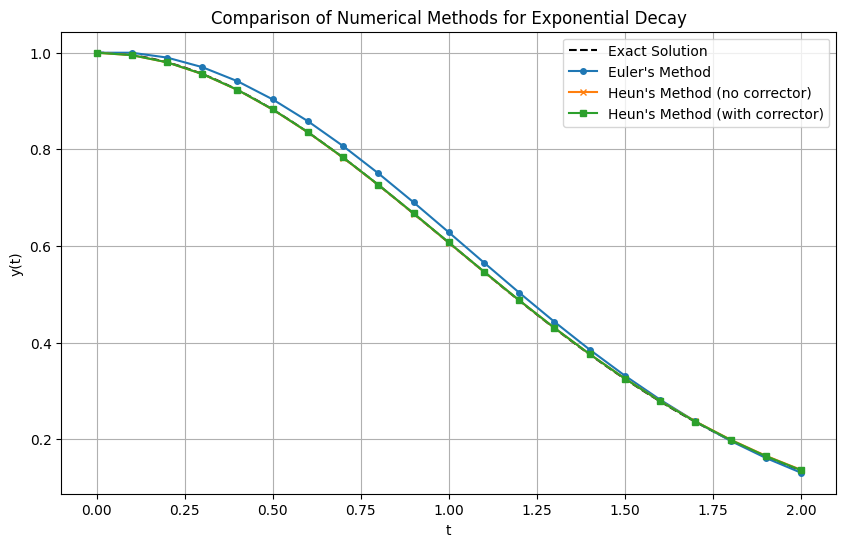

In [20]:
def exponential_decay(t, y):
    """
    Exponential decay ODE: dy/dt = -t*y
    """
    return -t * y

# Analytical solution for verification
def exponential_decay_exact(t):
    """
    Exact solution to dy/dt = -t*y with y(0) = 1
    """
    return np.exp(-0.5 * t * t)

# Test parameters
t_span = (0, 2)  # Time span from 0 to 2
y0 = 1.0         # Initial condition
num_steps = 20   # Number of steps

# Your code here to:
# 1. Apply Euler's method
# 2. Apply Heun's method without corrector iteration
# 3. Apply Heun's method with corrector iteration to tolerance of 1e-6
# 4. Calculate the analytical solution for comparison
# 5. Plot the results and discuss the accuracy


t_euler, y_euler = euler_method(exponential_decay, t_span, y0, num_steps)
t_heuns, y_heuns,h_c = heuns_method(exponential_decay, t_span, y0, num_steps, corrector_tol=None)
t_heuns_tol, y_heuns_tol, heuns_corrector = heuns_method(exponential_decay, t_span, y0, num_steps, corrector_tol=1e-6)

t_exact = np.linspace(t_span[0], t_span[1], 200)
y_exact = exponential_decay_exact(t_exact)


plt.figure(figsize=(10, 6))
plt.plot(t_exact, y_exact, label='Exact Solution', color='black', linestyle='--')
plt.plot(t_euler, y_euler, label='Euler\'s Method', marker='o', linestyle='-', markersize=4)
plt.plot(t_heuns, y_heuns, label='Heun\'s Method (no corrector)', marker='x', linestyle='-', markersize=4)
plt.plot(t_heuns_tol, y_heuns_tol, label='Heun\'s Method (with corrector)', marker='s', linestyle='-', markersize=4)

plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparison of Numerical Methods for Exponential Decay')
plt.legend()
plt.grid(True)
plt.show()

## Task 4: Test with Population Growth Model

Test your implementation on a logistic population growth model: $\frac{dy}{dt} = r\left(1 - \frac{y}{K}\right)y$

where $r$ is the growth rate and $K$ is the carrying capacity.

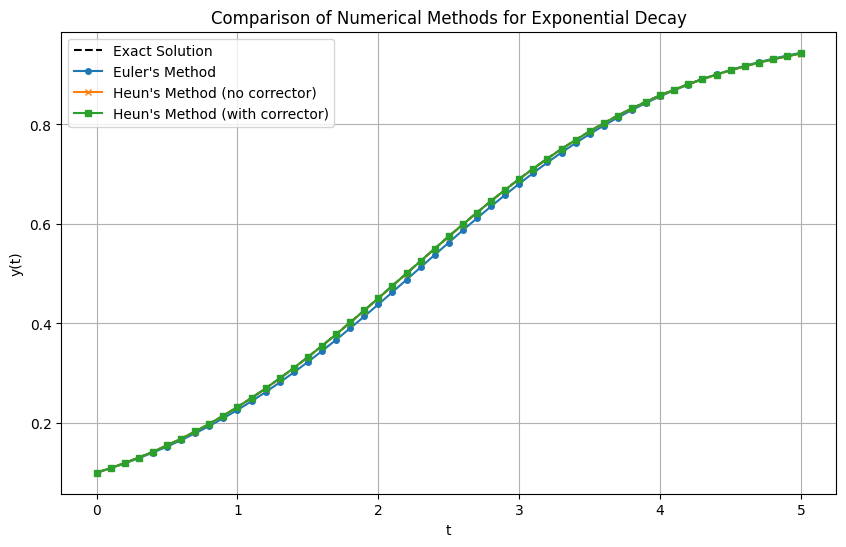

In [23]:
def population_growth(t, y, r=1.0, K=1.0):
    """
    Logistic population growth model: dy/dt = r(1 - y/K)y

    Parameters:
    -----------
    t : float
        Time point.
    y : float
        Population at time t.
    r : float
        Growth rate.
    K : float
        Carrying capacity.

    Returns:
    --------
    dy/dt : float
        Rate of change of population.
    """
    return r * (1 - y / K) * y

# Analytical solution for logistic growth
def population_growth_exact(t, y0=0.1, r=1.0, K=1.0):
    """
    Exact solution for logistic growth with y(0) = y0
    """
    return K * y0 * np.exp(r * t) / (K + y0 * (np.exp(r * t) - 1))

# Test parameters
t_span = (0, 5)    # Time span from 0 to 5
y0 = 0.1           # Initial condition (small population)
r = 1.0            # Growth rate
K = 1.0            # Carrying capacity
num_steps = 50     # Number of steps

# Your code here to:
# 1. Apply Euler's method
# 2. Apply Heun's method without corrector iteration
# 3. Apply Heun's method with corrector iteration to tolerance of 1e-6
# 4. Calculate the analytical solution for comparison
# 5. Plot the results and discuss the accuracy



t_euler, y_euler = euler_method(population_growth, t_span, y0, num_steps)
t_heuns, y_heuns,h_c = heuns_method(population_growth, t_span, y0, num_steps, corrector_tol=None)
t_heuns_tol, y_heuns_tol, heuns_corrector = heuns_method(population_growth, t_span, y0, num_steps, corrector_tol=1e-6)

t_exact = np.linspace(t_span[0], t_span[1], 200)
y_exact = population_growth_exact(t_exact)


plt.figure(figsize=(10, 6))
plt.plot(t_exact, y_exact, label='Exact Solution', color='black', linestyle='--')
plt.plot(t_euler, y_euler, label='Euler\'s Method', marker='o', linestyle='-', markersize=4)
plt.plot(t_heuns, y_heuns, label='Heun\'s Method (no corrector)', marker='x', linestyle='-', markersize=4)
plt.plot(t_heuns_tol, y_heuns_tol, label='Heun\'s Method (with corrector)', marker='s', linestyle='-', markersize=4)

plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparison of Numerical Methods for Exponential Decay')
plt.legend()
plt.grid(True)
plt.show()

